In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sys

In [2]:
D = np.random.randn(1000,500)
print(D.shape)

(1000, 500)


In [3]:
# preprocess the data
# batch normal
D -= np.mean(D, axis=0)

In [4]:
D /= np.std(D, axis=0)

In [5]:
hidden_layer_sizes = [500]*10
print(len(hidden_layer_sizes))
print(hidden_layer_sizes)

10
[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


In [6]:
nonlinearities = ['tanh']*len(hidden_layer_sizes)

In [7]:
act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}

In [8]:
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i==0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)#0.01#0.01
#     W = W * np.sqrt(1/W.shape[0])
    H = np.dot(X,W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H

In [9]:
print('input layer had mean %f and std %f' %(np.mean(D), np.std(D)))

input layer had mean -0.000000 and std 1.000000


In [10]:
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]

In [11]:
for i,H in Hs.items():
    print('hidden layer %d had mean %f and std %f' %(i, layer_means[i], layer_stds[i]))

hidden layer 0 had mean -0.000470 and std 0.721112
hidden layer 1 had mean 0.000919 and std 0.632443
hidden layer 2 had mean 0.000069 and std 0.595083
hidden layer 3 had mean -0.000145 and std 0.576851
hidden layer 4 had mean 0.000293 and std 0.567884
hidden layer 5 had mean 0.000579 and std 0.561172
hidden layer 6 had mean 0.000750 and std 0.559369
hidden layer 7 had mean -0.000106 and std 0.558184
hidden layer 8 had mean -0.000244 and std 0.556171
hidden layer 9 had mean -0.000199 and std 0.556603


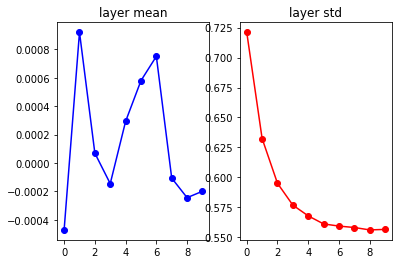

In [12]:
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')
plt.show()

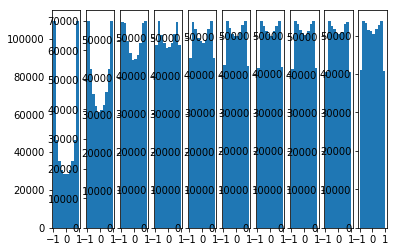

In [13]:
plt.figure()
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 10, range=(-1,1),rwidth=2)